In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [85]:
data = pd.read_csv('./data/Final-Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121864 entries, 0 to 121863
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         121864 non-null  int64 
 1   FORMATTED_CONTENT  121864 non-null  object
 2   CLASS              121864 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


In [86]:
data = data[['FORMATTED_CONTENT', 'CLASS']]
data.head()

,FORMATTED_CONTENT,CLASS
0,a way for entrepreneurial students to share th...,0
1,Just back from the UK thanks positiveparents w...,1
2,Totally unexpected great night,1
3,bodysculpter hi will email u in the morning I ...,1
4,Hello world Welcome to Affordable Web Pro Blog...,0


In [87]:
data[data['FORMATTED_CONTENT'].isna()]['CLASS'].value_counts()

Series([], Name: CLASS, dtype: int64)

In [88]:
data.dropna(inplace=True)

In [89]:
data[data['FORMATTED_CONTENT'].isna()]

,FORMATTED_CONTENT,CLASS


In [90]:
data.groupby('CLASS').describe().T

CLASS                           0                                1
FORMATTED_CONTENT count     62341                            59523
                  unique    58113                            56398
                  top     mimiinu  Check out this video on YouTube
                  freq         58                              101

<AxesSubplot:xlabel='CLASS'>

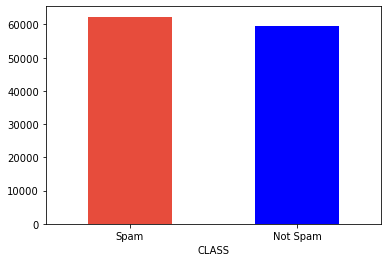

In [91]:
pd.DataFrame({"CLASS": ["Spam", "Not Spam"], "COUNT": data["CLASS"].value_counts()}).plot.bar(x="CLASS", y="COUNT", rot=0, legend=False, color=["#e74c3c", "blue"])

In [92]:
train_content, test_content, train_class, test_class = train_test_split(data['FORMATTED_CONTENT'],data['CLASS'],test_size=0.2,random_state=43)

In [93]:
count_vect = CountVectorizer(stop_words='english')
tfidf_transformer = TfidfTransformer()

In [94]:
train_content_counts = count_vect.fit_transform(train_content)
train_content_counts
train_content_tfidf = tfidf_transformer.fit_transform(train_content_counts)
train_content_tfidf

<97491x121925 sparse matrix of type '<class 'numpy.float64'>'
	with 851576 stored elements in Compressed Sparse Row format>

In [95]:
test_content_counts = count_vect.transform(test_content)
test_content_counts
test_content_tfidf = tfidf_transformer.transform(test_content_counts)
test_content_tfidf

<24373x121925 sparse matrix of type '<class 'numpy.float64'>'
	with 193839 stored elements in Compressed Sparse Row format>

In [96]:
model = LogisticRegression(max_iter=200)
model.fit(train_content_tfidf,train_class)

LogisticRegression(max_iter=200)

In [97]:
predictions = model.predict(test_content_tfidf)

In [98]:
accuracy_score(test_class, predictions)

0.806014852500718

In [99]:
print(classification_report(test_class, predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     12541
           1       0.80      0.80      0.80     11832

    accuracy                           0.81     24373
   macro avg       0.81      0.81      0.81     24373
weighted avg       0.81      0.81      0.81     24373



<AxesSubplot:>

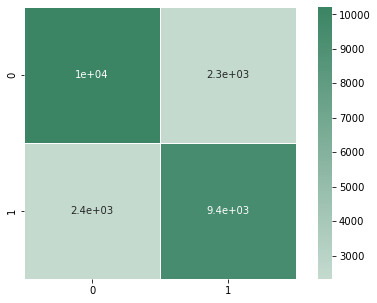

In [100]:
c_matrix = confusion_matrix(test_class, predictions)

f, ax = plt.subplots(figsize = (8, 5))
c_map = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix, center = 0, cmap=c_map, annot= True, square = True, linewidths= 0.5)

In [101]:
model2 = LogisticRegression(C = 2.0, max_iter=300)
model2.fit(train_content_tfidf,train_class)

LogisticRegression(C=2.0, max_iter=300)

In [102]:
predictions2 = model2.predict(test_content_tfidf)
accuracy_score(test_class, predictions2)

0.8183645837607189

In [103]:
print(classification_report(test_class,predictions2))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     12541
           1       0.81      0.82      0.81     11832

    accuracy                           0.82     24373
   macro avg       0.82      0.82      0.82     24373
weighted avg       0.82      0.82      0.82     24373



<AxesSubplot:>

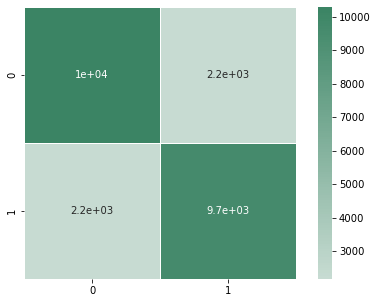

In [104]:
c_matrix2 = confusion_matrix(test_class, predictions2)

f, ax = plt.subplots(figsize = (8, 5))
c_map2 = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix2, center = 0, cmap=c_map2, annot= True, square = True, linewidths= 0.5)

In [105]:
model3 = LinearSVC()
model3.fit(train_content_tfidf,train_class)

LinearSVC()

In [106]:
predictions3 = model3.predict(test_content_tfidf)
accuracy_score(test_class, predictions3)

0.8333812005087597

In [107]:
print(classification_report(test_class,predictions3))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     12541
           1       0.82      0.84      0.83     11832

    accuracy                           0.83     24373
   macro avg       0.83      0.83      0.83     24373
weighted avg       0.83      0.83      0.83     24373



<AxesSubplot:>

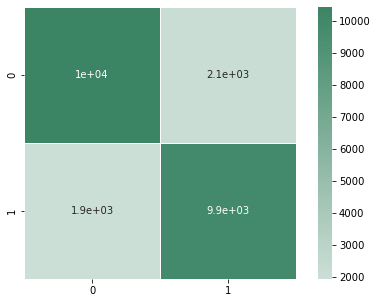

In [108]:
c_matrix3 = confusion_matrix(test_class, predictions3)

f, ax = plt.subplots(figsize = (8, 5))
c_map3 = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix3, center = 0, cmap=c_map3, annot= True, square = True, linewidths= 0.5)

In [109]:
model4 = MultinomialNB()
model4.fit(train_content_tfidf,train_class)

MultinomialNB()

In [110]:
predictions4 = model4.predict(test_content_tfidf)
accuracy_score(test_class, predictions4)

0.8031017929676281

In [111]:
print(classification_report(test_class,predictions4))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79     12541
           1       0.75      0.89      0.81     11832

    accuracy                           0.80     24373
   macro avg       0.81      0.81      0.80     24373
weighted avg       0.81      0.80      0.80     24373



<AxesSubplot:>

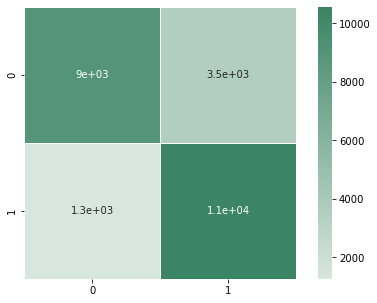

In [112]:
c_matrix4 = confusion_matrix(test_class, predictions4)

f, ax = plt.subplots(figsize = (8, 5))
c_map4 = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix4, center = 0, cmap=c_map4, annot= True, square = True, linewidths= 0.5)

In [30]:
model5 = MLPClassifier(verbose=True, shuffle=True, hidden_layer_sizes=(100,5))
model5.fit(train_content_tfidf,train_class)

Iteration 1, loss = 0.65722230
Iteration 2, loss = 0.51064504
Iteration 3, loss = 0.35640956
Iteration 4, loss = 0.21610576
Iteration 5, loss = 0.12510859
Iteration 6, loss = 0.07941605
Iteration 7, loss = 0.05537031
Iteration 8, loss = 0.04106062
Iteration 9, loss = 0.03192758
Iteration 10, loss = 0.02564675
Iteration 11, loss = 0.02138395
Iteration 12, loss = 0.01773318
Iteration 13, loss = 0.01526196
Iteration 14, loss = 0.01332462
Iteration 15, loss = 0.01180383
Iteration 16, loss = 0.01106012
Iteration 17, loss = 0.00985172
Iteration 18, loss = 0.00907803
Iteration 19, loss = 0.00838819
Iteration 20, loss = 0.00785593
Iteration 21, loss = 0.00749269
Iteration 22, loss = 0.00706625
Iteration 23, loss = 0.00664876
Iteration 24, loss = 0.00641133
Iteration 25, loss = 0.00615016
Iteration 26, loss = 0.00600511
Iteration 27, loss = 0.00573968
Iteration 28, loss = 0.00563533
Iteration 29, loss = 0.00547473
Iteration 30, loss = 0.00530505
Iteration 31, loss = 0.00523620
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 5), verbose=True)

In [31]:
predictions5 = model5.predict(test_content_tfidf)
accuracy_score(test_class, predictions5)

0.8750542299349241

In [32]:
print(classification_report(test_class,predictions5))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1142
           1       0.90      0.85      0.87      1163

    accuracy                           0.88      2305
   macro avg       0.88      0.88      0.88      2305
weighted avg       0.88      0.88      0.87      2305



<AxesSubplot:>

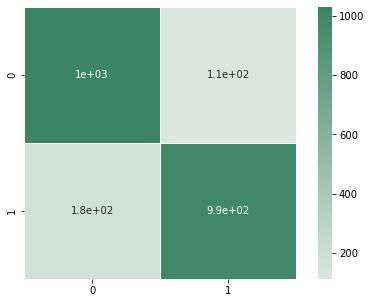

In [33]:
c_matrix5 = confusion_matrix(test_class, predictions5)

f, ax = plt.subplots(figsize = (8, 5))
c_map5 = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix5, center = 0, cmap=c_map5, annot= True, square = True, linewidths= 0.5)

In [108]:
new_test_content = pd.Series(['Happy Birthday Jane Many returs of the day', 'Check out my video here to earn quick money xxxx'])
new_test_content

0          Happy Birthday Jane Many returs of the day
1    Check out my video here to earn quick money xxxx
dtype: object

In [109]:
new_test_counts = count_vect.transform(['Happy Birthday Jane Many returs of the day', 'Check out my video here to earn quick money xxxx'])
new_test_tfidf = tfidf_transformer.transform(new_test_counts)
new_test_tfidf

<2x16749 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [110]:
predictions_new = model.predict(new_test_tfidf)
predictions_new

array([0, 1], dtype=int64)

In [111]:
predictions_new_1 = model2.predict(new_test_tfidf)
predictions_new_1

array([0, 1], dtype=int64)

In [112]:
predictions_new_4 = model4.predict(new_test_tfidf)
predictions_new_4

array([0, 1], dtype=int64)

In [113]:
predictions_new_5 = model5.predict(new_test_tfidf)
predictions_new_5

array([0, 1], dtype=int64)

In [113]:
from joblib import dump

In [116]:
dump(count_vect, './model/vectorizer.joblib')

['./model/vectorizer.joblib']

In [117]:
dump(tfidf_transformer, './model/tfidf.joblib')

['./model/tfidf.joblib']

In [118]:
dump(model3, './model/svm_linear.joblib')

['./model/svm_linear.joblib']

In [119]:
dump(model5, './model/mlp.joblib')

['./model/mlp.joblib']

In [119]:
dump(model2, './model/logistic.joblib')

['./model/logistic.joblib']

In [120]:
dump(model4, './model/multinomial_nb.joblib')

['./model/multinomial_nb.joblib']